In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('tasico_Hotel_Room.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,277,https://www.airbnb.com/rooms/5838525,2024-09-05,**During COVID 19 event** this property will n...,https://www.airbnb.com/users/show/24821505,2014-12-14,No hay tiempo de respuesta,No hay porcentaje de respuesta,No hay porcentaje de aceptacion,f,...,4.89,4.96,4.96,4.92,2.0,0.0,0.0,0.0,2.97,4
1,876,https://www.airbnb.com/rooms/16664089,2024-09-05,"My place is close to Shopping centre, bus stop...",https://www.airbnb.com/users/show/55589584,2016-01-21,No hay tiempo de respuesta,No hay porcentaje de respuesta,No hay porcentaje de aceptacion,f,...,4.91,4.97,4.96,4.92,2.0,0.0,0.0,0.0,0.15,4


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

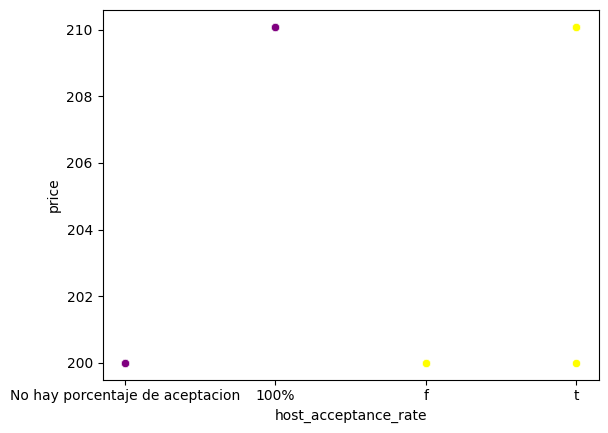

In [12]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [13]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [14]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No hay porcentaje de aceptacion", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [15]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.09]),
 'rank_': 1,
 'singular_': array([1.49071198]),
 'intercept_': np.float64(200.0)}

In [16]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([200.  , 200.  , 200.  , 200.  , 210.09, 210.09, 210.09, 210.09,
       210.09])

In [17]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,200.00,277,https://www.airbnb.com/rooms/5838525,2024-09-05,**During COVID 19 event** this property will n...,https://www.airbnb.com/users/show/24821505,2014-12-14,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.0,...,4.89,4.96,4.96,4.92,2.0,0.0,0.0,0.0,2.97,4
1,200.00,876,https://www.airbnb.com/rooms/16664089,2024-09-05,"My place is close to Shopping centre, bus stop...",https://www.airbnb.com/users/show/55589584,2016-01-21,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.0,...,4.91,4.97,4.96,4.92,2.0,0.0,0.0,0.0,0.15,4
2,200.00,2274,https://www.airbnb.com/rooms/35131120,2024-09-05,Sunny place with modern kitchen and bathroom. ...,https://www.airbnb.com/users/show/264618043,2019-05-27,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.0,...,4.91,4.97,5.00,4.92,1.0,0.0,0.0,0.0,0.17,4
3,200.00,2497,https://www.airbnb.com/rooms/39472748,2024-09-05,2 Bedrooms for Shared Accomodation Next to Swa...,https://www.airbnb.com/users/show/236629443,2019-01-14,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.0,...,4.91,4.97,4.96,4.92,1.0,0.0,0.0,0.0,0.19,4
4,210.09,2699,https://www.airbnb.com/rooms/41887260,2024-09-05,Montacute Boutique Bunkhouse is a multi-award ...,https://www.airbnb.com/users/show/311006367,2019-11-20,within an hour,100%,1.0,...,4.91,4.93,4.96,4.89,6.0,0.0,0.0,0.0,0.53,4
5,210.09,2700,https://www.airbnb.com/rooms/41889417,2024-09-05,Montacute Boutique Bunkhouse is a multi-award ...,https://www.airbnb.com/users/show/311006367,2019-11-20,within an hour,100%,1.0,...,4.91,4.97,4.96,4.92,6.0,0.0,0.0,0.0,0.47,4
6,210.09,2715,https://www.airbnb.com/rooms/42073119,2024-09-05,Montacute Boutique Bunkhouse is a multi-award ...,https://www.airbnb.com/users/show/311006367,2019-11-20,within an hour,100%,1.0,...,4.80,4.97,4.96,4.95,6.0,0.0,0.0,0.0,1.07,4
7,210.09,2716,https://www.airbnb.com/rooms/42073656,2024-09-05,Montacute Boutique Bunkhouse is a multi-award ...,https://www.airbnb.com/users/show/311006367,2019-11-20,within an hour,100%,1.0,...,4.74,4.88,4.96,4.93,6.0,0.0,0.0,0.0,1.47,4
8,210.09,2742,https://www.airbnb.com/rooms/42440411,2024-09-05,Bed in 4 Share Mixed Room includes Single bunk...,https://www.airbnb.com/users/show/195296869,2018-06-12,within an hour,100%,1.0,...,4.91,4.89,4.96,4.89,1.0,0.0,0.0,0.0,0.90,4


In [18]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

1.0

In [19]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(1.0)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

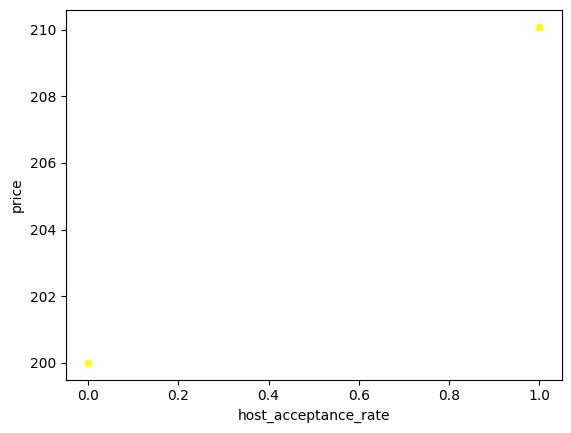

In [20]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [21]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_12300\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [22]:
df['room_type'] = 1

In [23]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

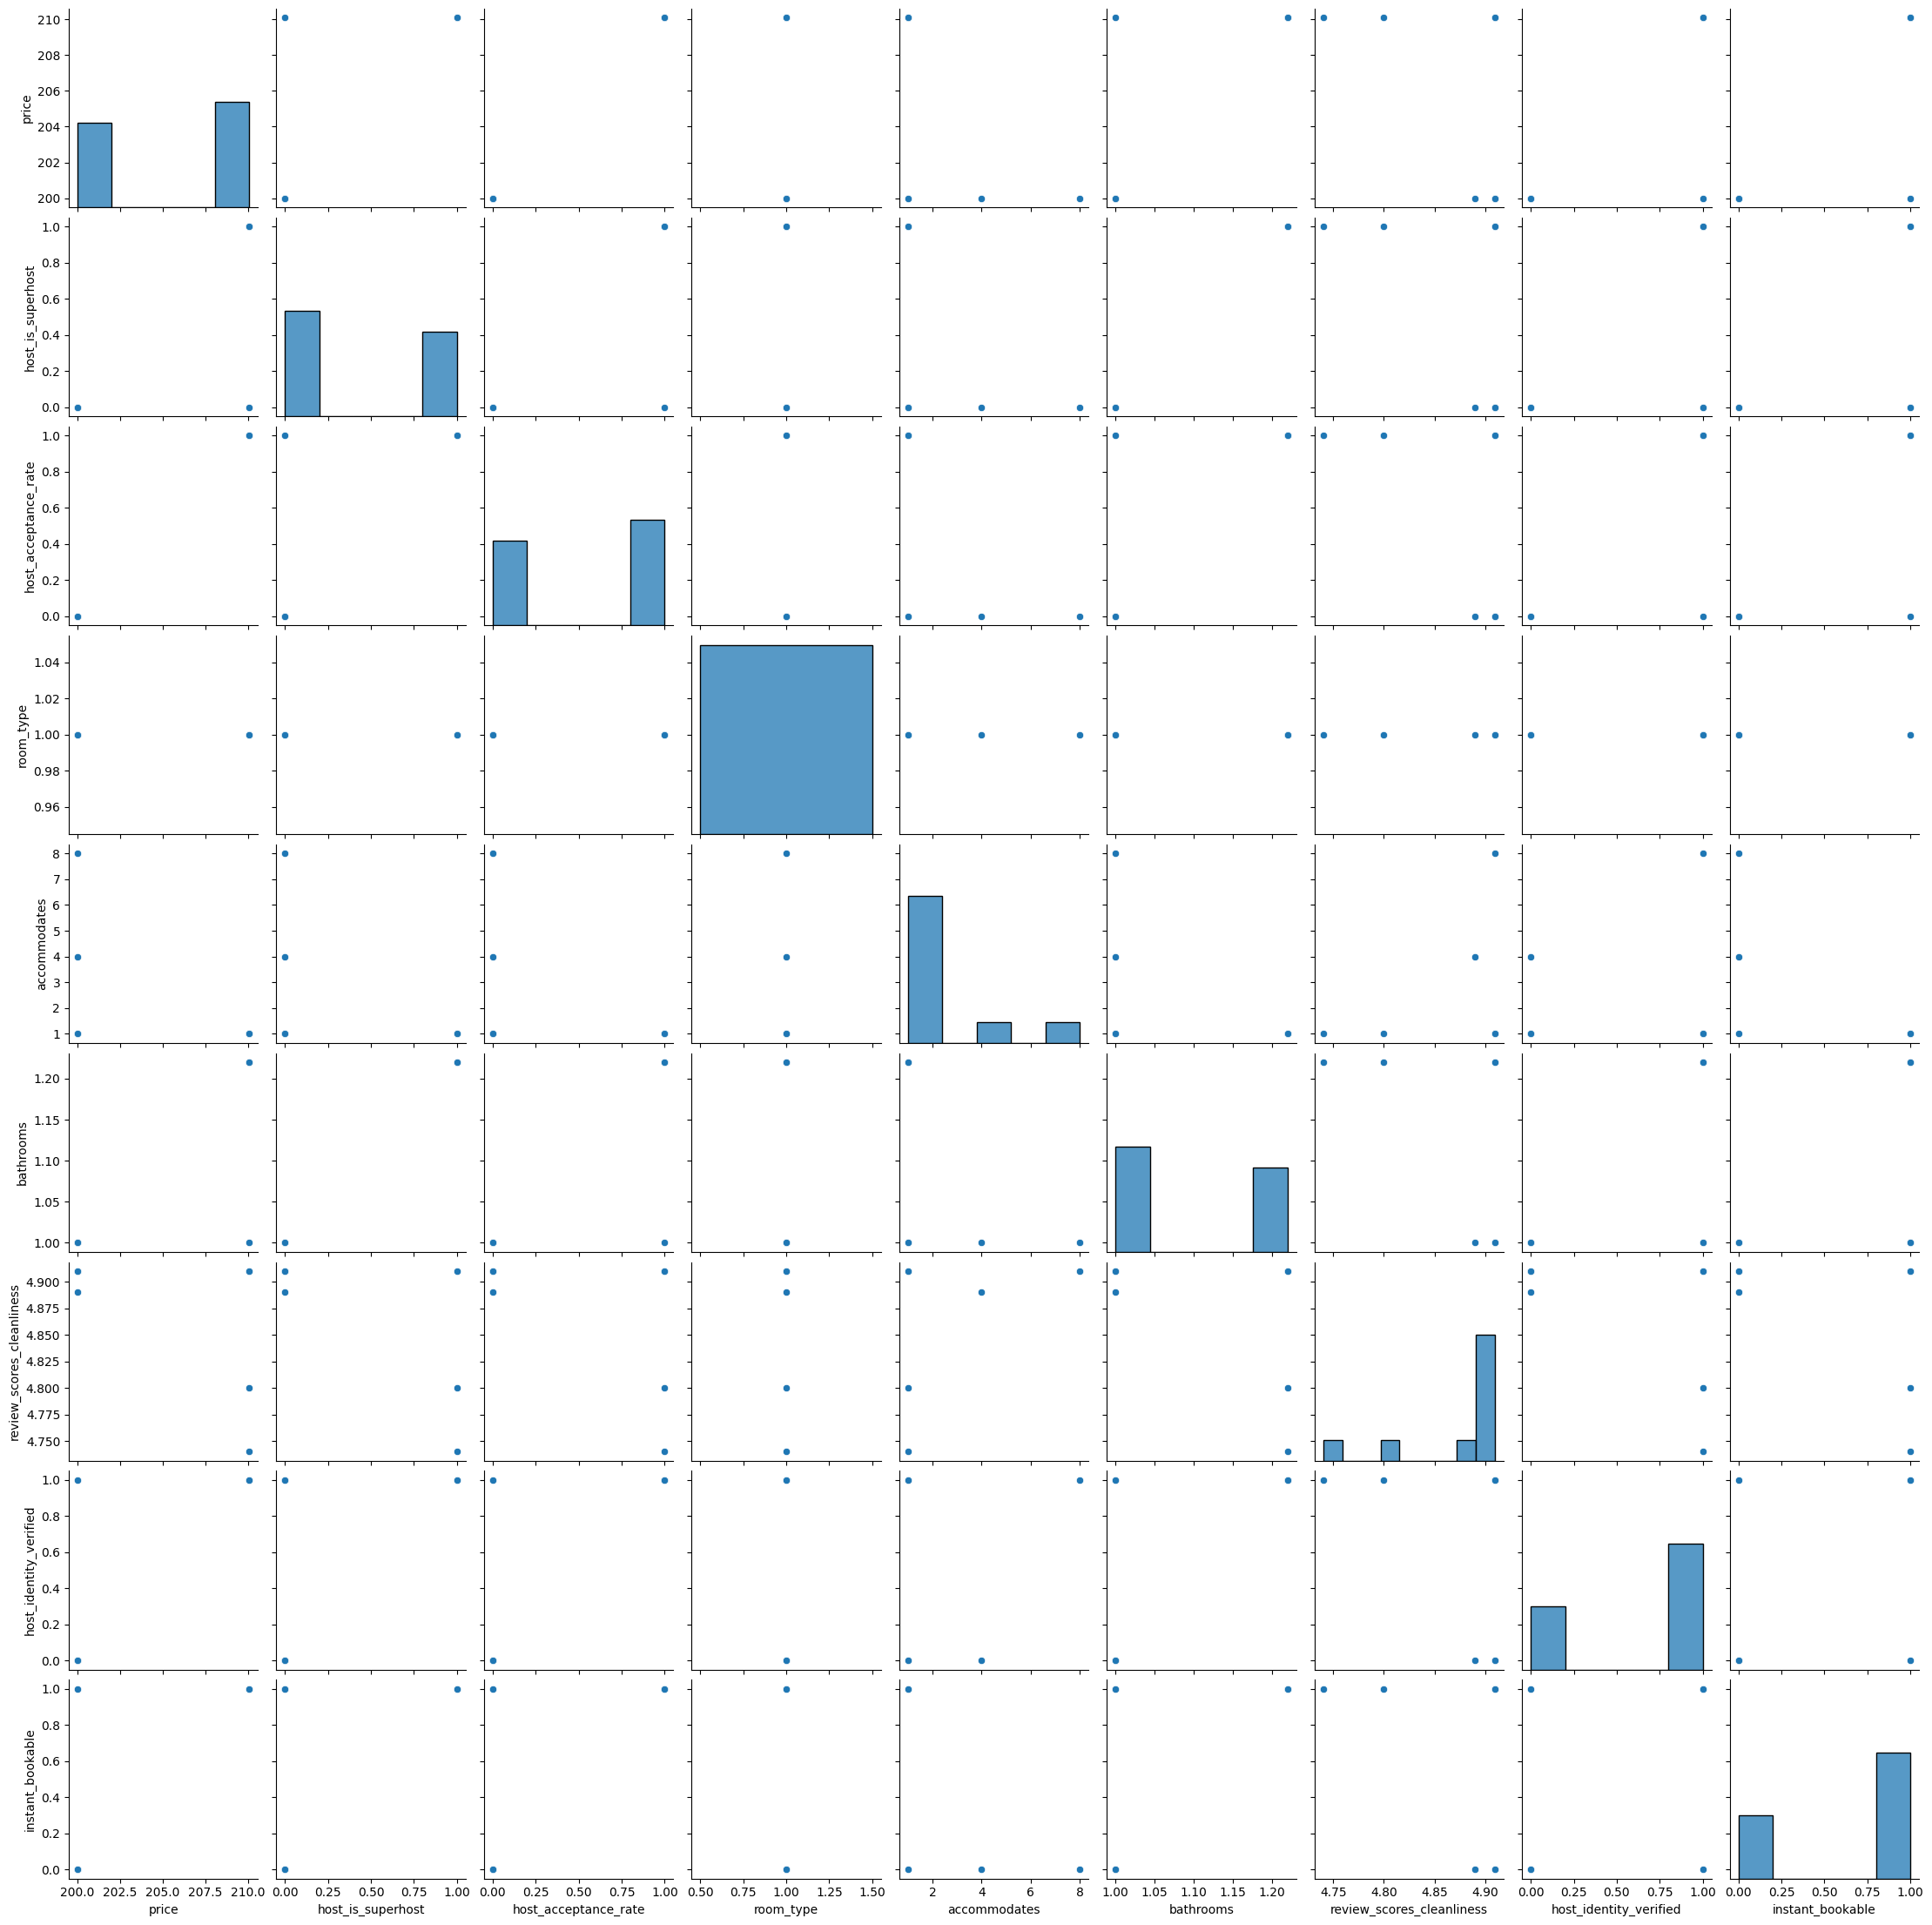

In [24]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [25]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.800000,1.000000,NaN,-0.544250,0.800000,-0.429041,0.790569,0.790569
host_is_superhost,0.800000,1.000000,0.800000,NaN,-0.435400,1.000000,-0.555230,0.632456,0.632456
host_acceptance_rate,1.000000,0.800000,1.000000,NaN,-0.544250,0.800000,-0.429041,0.790569,0.790569
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,-0.544250,-0.435400,-0.544250,NaN,1.000000,-0.435400,0.225265,0.034421,-0.688428
bathrooms,0.800000,1.000000,0.800000,NaN,-0.435400,1.000000,-0.555230,0.632456,0.632456
review_scores_cleanliness,-0.429041,-0.555230,-0.429041,NaN,0.225265,-0.555230,1.000000,-0.319235,-0.319235
host_identity_verified,0.790569,0.632456,0.790569,NaN,0.034421,0.632456,-0.319235,1.000000,0.500000
instant_bookable,0.790569,0.632456,0.790569,NaN,-0.688428,0.632456,-0.319235,0.500000,1.000000


In [26]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.800000,1.000000,NaN,0.544250,0.800000,0.429041,0.790569,0.790569
host_is_superhost,0.800000,1.000000,0.800000,NaN,0.435400,1.000000,0.555230,0.632456,0.632456
host_acceptance_rate,1.000000,0.800000,1.000000,NaN,0.544250,0.800000,0.429041,0.790569,0.790569
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.544250,0.435400,0.544250,NaN,1.000000,0.435400,0.225265,0.034421,0.688428
bathrooms,0.800000,1.000000,0.800000,NaN,0.435400,1.000000,0.555230,0.632456,0.632456
review_scores_cleanliness,0.429041,0.555230,0.429041,NaN,0.225265,0.555230,1.000000,0.319235,0.319235
host_identity_verified,0.790569,0.632456,0.790569,NaN,0.034421,0.632456,0.319235,1.000000,0.500000
instant_bookable,0.790569,0.632456,0.790569,NaN,0.688428,0.632456,0.319235,0.500000,1.000000


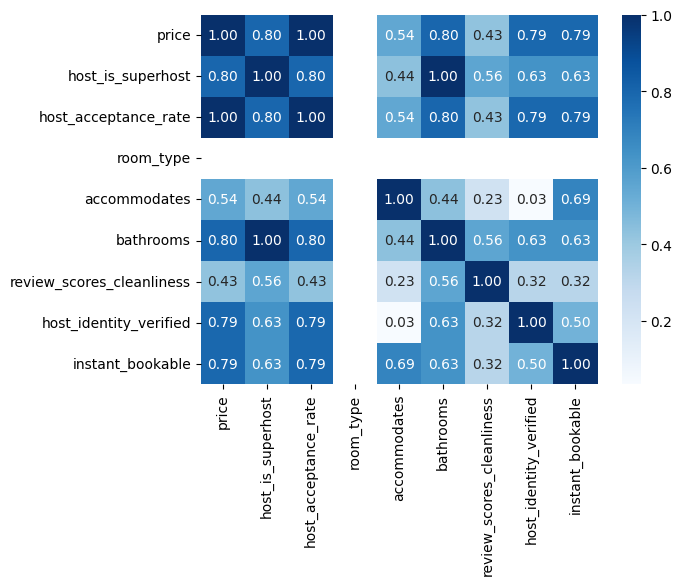

In [27]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

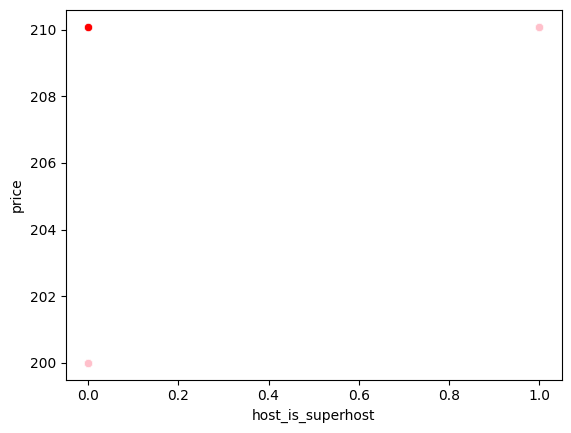

In [28]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [29]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [30]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [31]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.072]),
 'rank_': 1,
 'singular_': array([1.49071198]),
 'intercept_': np.float64(202.018)}

In [32]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.6400000000000001

In [33]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([202.018, 202.018, 202.018, 202.018, 210.09 , 210.09 , 210.09 ,
       210.09 , 202.018])

In [34]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,202.018,200.00,0,0.0,1,4.0,1.00,4.89,0,0
1,202.018,200.00,0,0.0,1,1.0,1.00,4.91,0,1
2,202.018,200.00,0,0.0,1,1.0,1.00,4.91,0,0
3,202.018,200.00,0,0.0,1,8.0,1.00,4.91,1,0
4,210.090,210.09,1,1.0,1,1.0,1.22,4.91,1,1
5,210.090,210.09,1,1.0,1,1.0,1.22,4.91,1,1
6,210.090,210.09,1,1.0,1,1.0,1.22,4.80,1,1
7,210.090,210.09,1,1.0,1,1.0,1.22,4.74,1,1
8,202.018,210.09,0,1.0,1,1.0,1.00,4.91,1,1


In [35]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.6400000000000001

In [36]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8)

<Axes: xlabel='host_is_superhost', ylabel='price'>

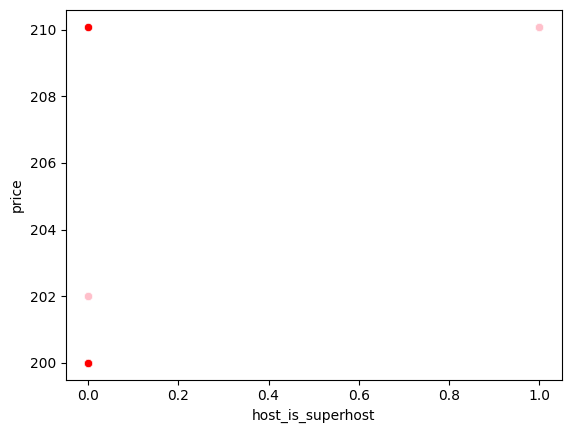

In [37]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

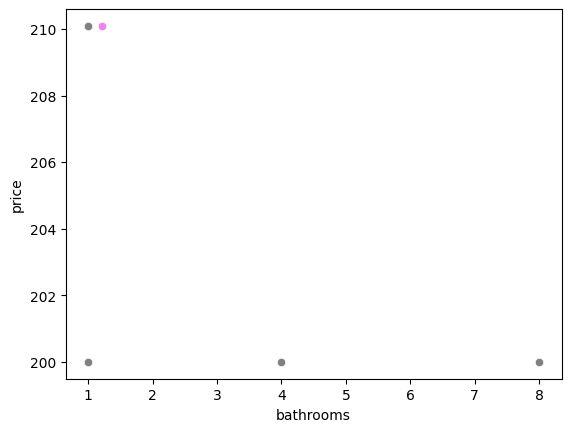

In [38]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [39]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [40]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [41]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([36.69090909]),
 'rank_': 1,
 'singular_': array([0.32795664]),
 'intercept_': np.float64(165.32709090909088)}

In [42]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.6400000000000001

In [43]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([202.018, 202.018, 202.018, 202.018, 210.09 , 210.09 , 210.09 ,
       210.09 , 202.018])

In [44]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

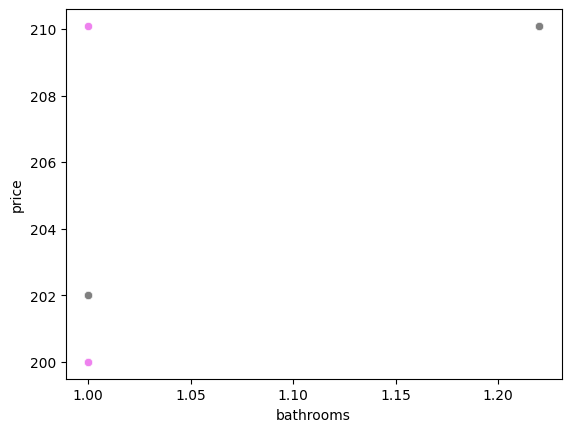

In [45]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [46]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.6400000000000001

In [47]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

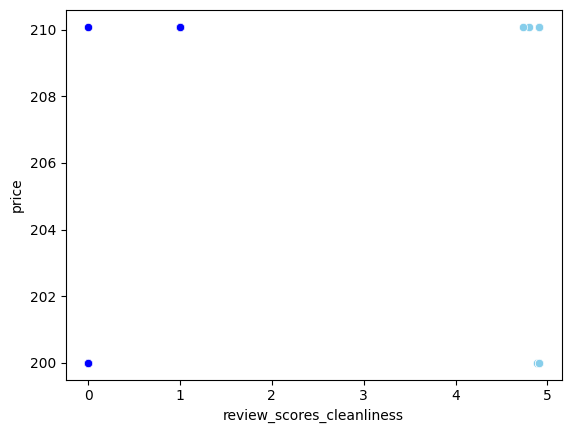

In [48]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [49]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [50]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [51]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-36.41825902]),
 'rank_': 1,
 'singular_': array([0.17720045]),
 'intercept_': np.float64(383.20526539278103)}

In [52]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.18407643312101862

In [53]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([205.11997877, 204.39161359, 204.39161359, 204.39161359,
       204.39161359, 204.39161359, 208.39762208, 210.58271762,
       204.39161359])

In [54]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

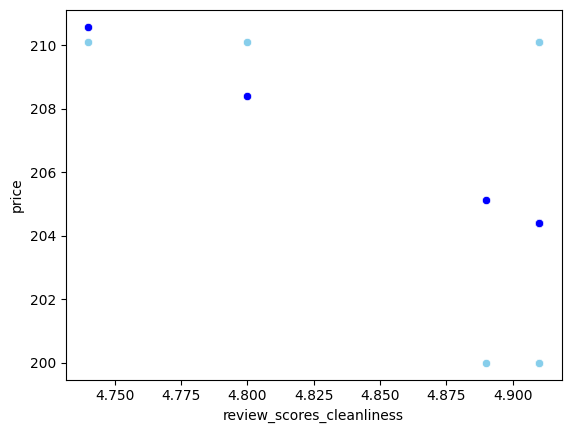

In [55]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [56]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.18407643312101862

In [57]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.4290412953563079)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

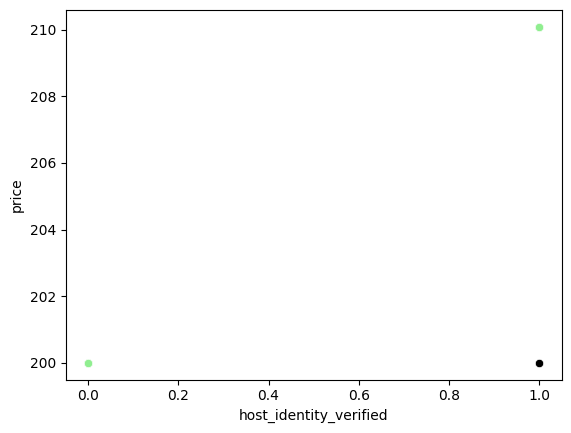

In [58]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [59]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [60]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [61]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.40833333]),
 'rank_': 1,
 'singular_': array([1.41421356]),
 'intercept_': np.float64(200.0)}

In [62]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.625

In [63]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([200.        , 200.        , 200.        , 208.40833333,
       208.40833333, 208.40833333, 208.40833333, 208.40833333,
       208.40833333])

In [64]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,200.000000,205.119979,202.018,202.018,200.00,0,0.0,1,4.0,1.00,4.89,0,0
1,200.000000,204.391614,202.018,202.018,200.00,0,0.0,1,1.0,1.00,4.91,0,1
2,200.000000,204.391614,202.018,202.018,200.00,0,0.0,1,1.0,1.00,4.91,0,0
3,208.408333,204.391614,202.018,202.018,200.00,0,0.0,1,8.0,1.00,4.91,1,0
4,208.408333,204.391614,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.91,1,1
5,208.408333,204.391614,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.91,1,1
6,208.408333,208.397622,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.80,1,1
7,208.408333,210.582718,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.74,1,1
8,208.408333,204.391614,202.018,202.018,210.09,0,1.0,1,1.0,1.00,4.91,1,1


<Axes: xlabel='host_identity_verified', ylabel='price'>

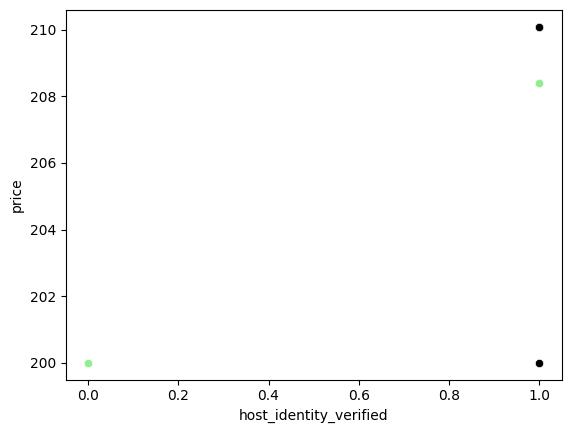

In [65]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [66]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.625

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.7905694150420949)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

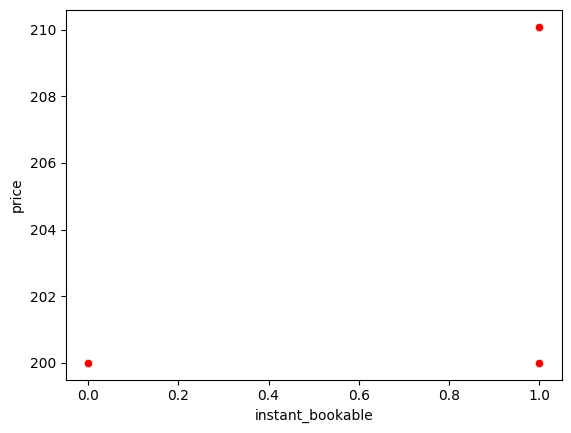

In [68]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [69]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [70]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [71]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.40833333]),
 'rank_': 1,
 'singular_': array([1.41421356]),
 'intercept_': np.float64(200.0)}

In [72]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.625

In [73]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([200.        , 208.40833333, 200.        , 200.        ,
       208.40833333, 208.40833333, 208.40833333, 208.40833333,
       208.40833333])

In [74]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,200.000000,200.000000,205.119979,202.018,202.018,200.00,0,0.0,1,4.0,1.00,4.89,0,0
1,208.408333,200.000000,204.391614,202.018,202.018,200.00,0,0.0,1,1.0,1.00,4.91,0,1
2,200.000000,200.000000,204.391614,202.018,202.018,200.00,0,0.0,1,1.0,1.00,4.91,0,0
3,200.000000,208.408333,204.391614,202.018,202.018,200.00,0,0.0,1,8.0,1.00,4.91,1,0
4,208.408333,208.408333,204.391614,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.91,1,1
5,208.408333,208.408333,204.391614,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.91,1,1
6,208.408333,208.408333,208.397622,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.80,1,1
7,208.408333,208.408333,210.582718,210.090,210.090,210.09,1,1.0,1,1.0,1.22,4.74,1,1
8,208.408333,208.408333,204.391614,202.018,202.018,210.09,0,1.0,1,1.0,1.00,4.91,1,1


<Axes: xlabel='instant_bookable', ylabel='price'>

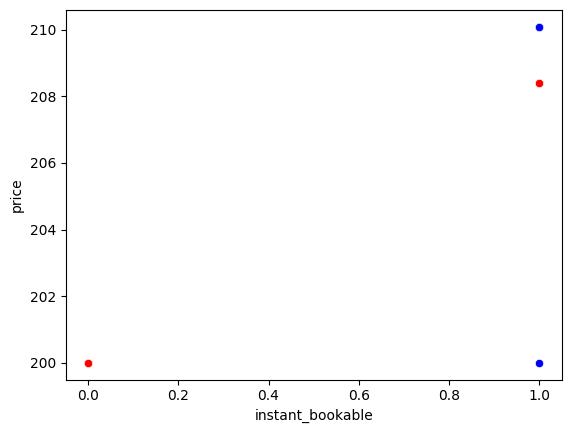

In [75]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [76]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.625

In [77]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.7905694150420949)